# Example Applications of Continunity (pp. 182)

## Example 1: Application of Continunity to a Spa

Consider an open tank with two connections as depicted in {numref}`example-2`

```{figure} example-2.png
---
width: 600px
name: example-2
---
Open tank with inlet and outlet
```

Apply our problem solving protocol as in {numref}`example-2-2`

```{figure} example-2-2.png
---
width: 600px
name: example-2-2
---
Problem Solving Protocol: Sketch, CV Definition, Governing Principles, Knowns and Unknowns
```

Once we have a formula we can use ENGR-1330 tools (as a calculator):

In [5]:
import math
# known
Q_in = 20 # cuft/s
D_out = 1.0 # m^2
gravity = 32.2 # ft/s/s
# intermediate
A_out = math.pi*pow(D_out,2)/4.0
# equilibrium depth
h = pow(Q_in/A_out,2)/(2*gravity)
print('equilibrium depth is .... wait for it ...',round(h,1),'feat')

equilibrium depth is .... wait for it ... 10.1 feat


## Example 2: Time to Drain a Tank

Consider an open tank as depicted in {numref}`time-2-drain`

```{figure} time-2-drain.png
---
width: 600px
name: time-2-drain
---
Open tank with outlet
```

Apply our problem solving protocol as in {numref}`example-3-2`

```{figure} example-3-2.png
---
width: 600px
name: example-3-2
---
Problem Solving Protocol: Sketch, CV Definition, Governing Principles, Knowns and Unknowns
```
Apply our Calculus tools from MATH 2450

```{figure} example-3-3.png
---
width: 600px
name: example-3-3
---
Separation and Integration
```

Once we have a formula we can use ENGR-1330 tools (as a calculator):

In [10]:
import math
H_0 = 3    # meters initial depth
H   = 0.3  # meters ending depth
D   = 0.6  # meters tank diameter
d   = 0.03 # meters outlet diameter
g   = 9.8  # m/s/s gravitational avcceleeration conastant
# calculations
time = (2*math.sqrt(H)-2*math.sqrt(H_0)) / -(math.sqrt(2*g)*pow(d/D,2))
print('Time to drain is',round(time,1),'seconds')

Time to drain is 214.0 seconds


## Example 3: Time to Drain a Tank 

Now consider a similar problem

```{figure} example-3-4.png
---
width: 600px
name: example-3-4
---
Open tank with outlet
```

We can inspect and establish that it is an identical situation with different diameters of the tank and hole, and different starting and ending depths, so we can use our tool just developed.

In [3]:
import math
H_0 = 3    # meters initial depth
H   = 0.5  # meters ending depth
D   = 0.6  # meters tank diameter
d   = 0.03 # meters outlet diameter
g   = 9.8  # m/s/s gravitational acceleration conastant
# calculations
time = (2*math.sqrt(H)-2*math.sqrt(H_0)) / -(math.sqrt(2*g)*pow(d/D,2))
print('Time to drain is',round(time,1),'seconds')

Time to drain is 185.2 seconds


### Example 4: Time to Drain a Tank (Computational Methods)

Now consider a pressure tank with oil

```{figure} example-live.png
---
width: 600px
name: example-live
---
Pressure tank with outlet
```

Here we are given the drainage equation, and the variable pressure terms, but cannot apply analysis (Calculus) to obtain a closed-form solution, thus we can:
- Give up
- Practice saying "How about a hot apple pie to go with that slop?"
- Approximate using ENGR-1330 tools

Simply insert the pressure term into the drainage equation and develop a function to estimate the change in eleveation over a short time as:


```{figure} example-live-fd.png
---
width: 600px
name: example-live-fd
---
Pressure tank with outlet
```
Now we can build a tool


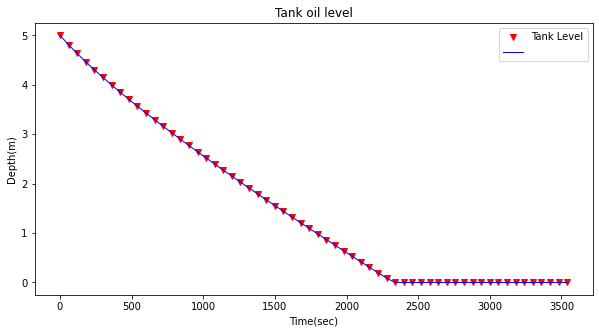

In [83]:
import math
import matplotlib.pyplot as plt
# a plotting function
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Tank Level',''])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return
# constants
pie = math.pi
p_initial = 3e05 #Pa initial pressure
p_atm     = 1.01e05 #Pa atmospheric pressure
g         = 9.8  #m/s/s
rho_oil   = 1000 #kg/m^3
L         = 6    #m tank height
De        = 0.02 #m outlet diameter
Dt        = 2.0  #m tank diameter
H0        = 5    #m initial depth
time      = []   # time seconds, an empty list
depth     = []   # depth meters, an empty list
pnow      = []   # pressure, an empty list
ddepth    = []   #change in depth, empty list for debuggiun'
how_many  = 60   #time steps
deltat    = 60   #seconds a time step length
# constants
Ae = (pie*De**2)/4
At = (pie*Dt**2)/4
# pressure function
def p_now(p_initial,p_atm,L,H0,H):
    p_now = (p_initial+p_atm)*((L-H0)/(L-H))#-p_atm
    return(p_now)
# CV velocity function
def dhdt(Ae,At,g,H,p,rho):
    dhdt = -(Ae/At)*math.sqrt(2*g*h + 2*p/rho)
    return(dhdt)
# initial conditions
time.append(0)
depth.append(H0)
pnow.append(p_initial)
ddepth.append(dhdt(Ae,At,g,H0,p_now(p_initial,p_atm,L,H0,H0),rho_oil))

for i in range(1,how_many):
    time.append(i*deltat)
    depth.append(depth[i-1]+deltat*ddepth[i-1])
    if depth[i] < 0:
        depth[i]=0.0
    pnow.append(p_now(p_initial,p_atm,L,H0,depth[i]));
    ddepth.append(dhdt(Ae,At,g,depth[i],pnow[i],rho_oil))

    
    
#for i in range(how_many):    
#    print(time[i],round(depth[i],3),round(pnow[i],3),round(ddepth[i],6))
    
#now plot
make2plot(time,depth,time,depth,'Time(sec)',"Depth(m)","Tank oil level")
    

While not at all perfect it illustrates using a computational method  to approximate the problem, and more importantly determine a good guess of the time to drain the tank.